### [ 지도학습-회귀 ]
- 회귀(regresiion) : 수치값을 에측하는 학습
    * ex) 거리, 시간, 무게, 집값 ...  
- 주제 : 공부 시간에 따른 점수 예측
- 방법 : Linear Model 계열의 LinearRegrssion

[1] 모듈 로딩 및 데이터 준비 <hr>

In [26]:
## ===========================================================
## [1-1] 모듈 로딩
## ===========================================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## CoW 활성화 : 복사와 공유 자동설정 기능 활성화
pd.options.mode.copy_on_write = True


# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

In [27]:
## ======================================================
## [1-2] 데이터 준비 및 확인
## ======================================================
hour = [1,2,3,5,7,8,10]
score = [15,32,45,55,60,73,91]

## 공부시간과 성적 데이터셋
dataDF = pd.DataFrame({'Hour':hour, 'Score':score})
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hour    7 non-null      int64
 1   Score   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


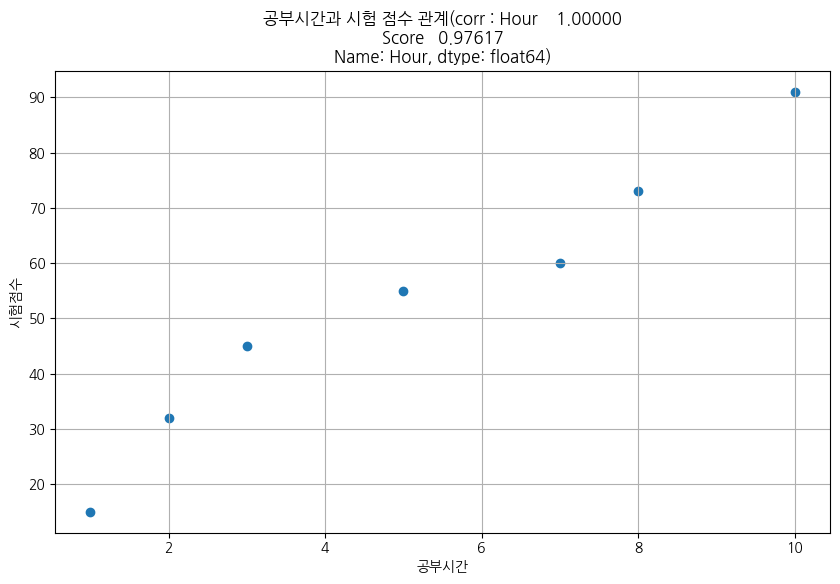

In [28]:
## ====================================================
## 공부시간과 성적 관계 시각화 => Linear Model 로써
##                            피쳐와 타겟 선형 관계성
## ====================================================
## => 상관계수 계산 : [기] person -> 피쳐와 타겟의 직선의 선형성
corr = dataDF.corr(numeric_only=True)
corr_value = corr['Hour']


plt.figure(figsize=(10,6))
plt.scatter(dataDF.Hour,dataDF.Score)
plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.grid()
plt.title(f'공부시간과 시험 점수 관계(corr : {corr_value})')
plt.show()

[2] 피쳐와 타겟/학습용과 테스트용 분리 <hr>

In [29]:
## [2-1] 피쳐와 타겟 분리
feature = dataDF[dataDF.columns[0:1]]      ## 피쳐는 무조건 2차원 => 슬라이싱으로 : dataDF[['Length']]
target = dataDF[dataDF.columns[-1]]          ## 타겟은 1차원 : dataDF['Weight']

display(dataDF, feature,target)

,Hour,Score
0,1,15
1,2,32
2,3,45
3,5,55
4,7,60
5,8,73
6,10,91


,Hour
0,1
1,2
2,3
3,5
4,7
5,8
6,10


0    15
1    32
2    45
3    55
4    60
5    73
6    91
Name: Score, dtype: int64

In [30]:
## [2-2] 학습용과 테스트용 분리
x_train, x_test, y_train, y_test = train_test_split(feature, target,
                                                    test_size=0.2,
                                                    random_state=10 )  

print(f'[Train] x_train : {x_train.shape}, x_test : {x_test.shape}')     
print(f'[Test] y_train : {y_train.shape}, y_test : {y_test.shape}')     

[Train] x_train : (5, 1), x_test : (2, 1)
[Test] y_train : (5,), y_test : (2,)


[3] 학습 진행 <hr>

In [31]:
lrModel = LinearRegression()
lrModel

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
## 학습진행 => 학습용 데이터셋만 사용 => 시험점수 = 공부시간*w1 + w0
lrModel.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
## 학습 후 학습용데이터셋 기반 모델 파라미터 설정
##  - 모델 파라미터 : 파라미터이름_ -> 피처에 곱해지는 가중치 w, 결과 미세조정 bias 

print('coef_:',lrModel.coef_)                   ## 가중치
print('intercept_:',lrModel.intercept_)         ## 절편
print('feature_names_in_', lrModel.feature_names_in_)

print('선형힉 즉, 모델 : ',f'{lrModel.coef_} * 공부시간 + {lrModel.intercept_}')

coef_: [7.446237]
intercept_: 12.747311827956985
feature_names_in_ ['Hour']
선형힉 즉, 모델 :  [7.446237] * 공부시간 + 12.747311827956985


[4] 성능 평가 <hr>

In [34]:
## 훈련용으로 성능 평가 & 테스트용 성능 평가 비교
train_score = lrModel.score(x_train, y_train)
test_score = lrModel.score(x_test, y_test)

print(f'[train_score] {train_score}')
print(f'[test_score] {test_score}')

[train_score] 0.955795888267711
[test_score] 0.8935221976774963


[5] 예측 : 새로운 데이터 사용 <hr>
- predict(2D_새로운피쳐) ==> 예측 무게 값
- n_neighbors 무게 추출 => 평균한 값과 예측 무게값이 같은지 확인

In [35]:
newDF = pd.DataFrame([4.3], columns=dataDF.columns[0:1])
newDF

,Hour
0,4.30000


In [36]:
## 서ㅓㄴ형식 값들
lrscore = lrModel.predict(pd.DataFrame([[1],[11]], columns=dataDF.columns[0:1]))

In [37]:
## 예측값 추출
pre_score = lrModel.predict(newDF)
pre_score

array([44.766129])

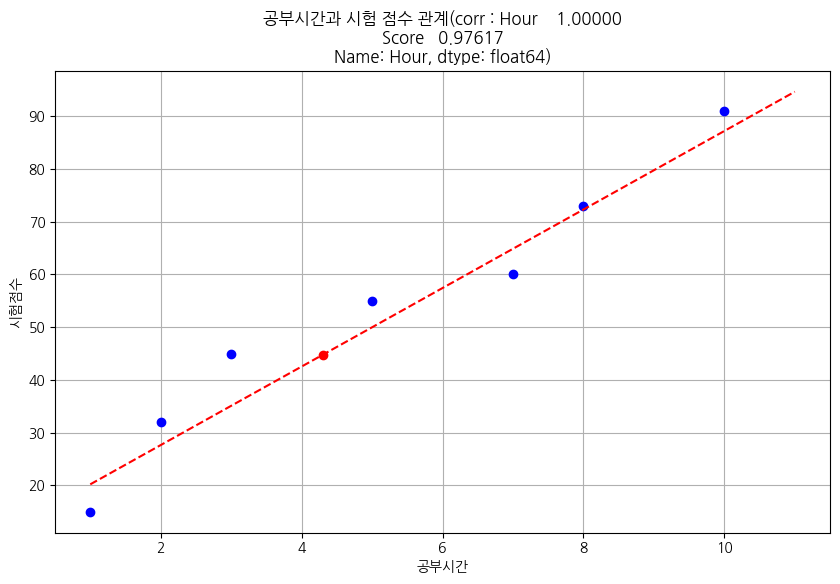

In [38]:
plt.figure(figsize=(10,6))

plt.plot(dataDF.Hour, dataDF.Score,'bo')
plt.plot(newDF.Hour,pre_score,'ro')

## 선형식 그래프
plt.plot([1,11],lrscore,'r--')

plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.grid()
plt.title(f'공부시간과 시험 점수 관계(corr : {corr_value})')
plt.show()


[pre_score] [44.766129]
선형식 즉, 모델 : 44.766129032258064


,Hour
0,1
3,5
4,7
5,8
1,2


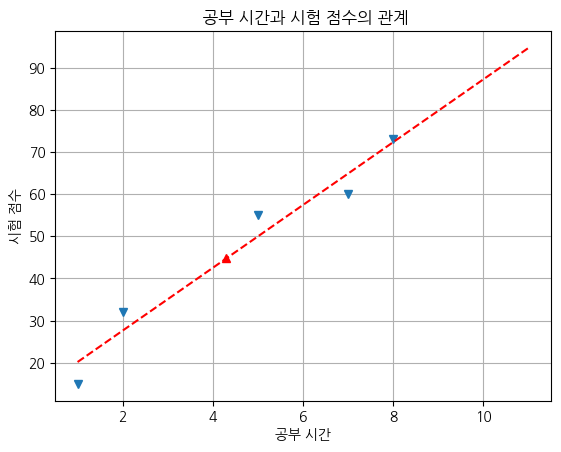

In [46]:
# 예측값 추출
pre_score = lrModel.predict(newDF)
print("[pre_score]", pre_score)

print(f'선형식 즉, 모델 : {lrModel.coef_[0]*4.3 + lrModel.intercept_}')

## ===> 시각화
## 학습 데이터
display(x_train)
plt.plot(x_train.Hour, y_train, 'v')

## 선형식 그래프
plt.plot([1,11], lrscore, 'r--')


## 새로운 데이터
plt.plot(newDF.Hour, pre_score, 'r^')

# => 시각화
plt.title(f" 공부 시간과 시험 점수의 관계")
plt.xlabel('공부 시간')
plt.ylabel('시험 점수')
plt.grid()
plt.show()